# 02 - Análise Exploratória

Este notebook realiza a análise exploratória dos dados processados.

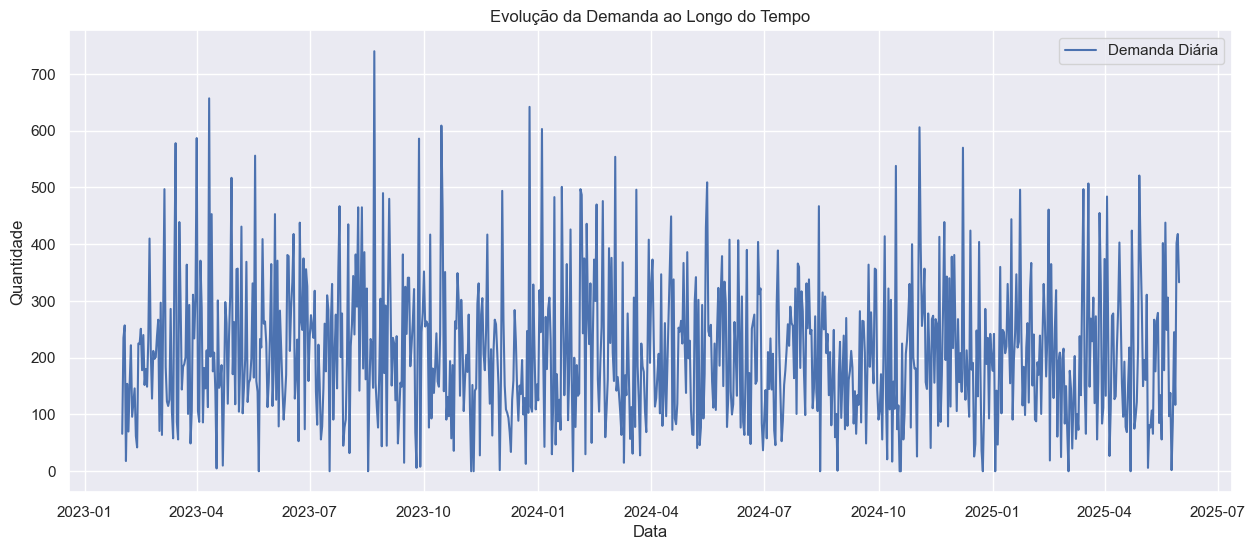

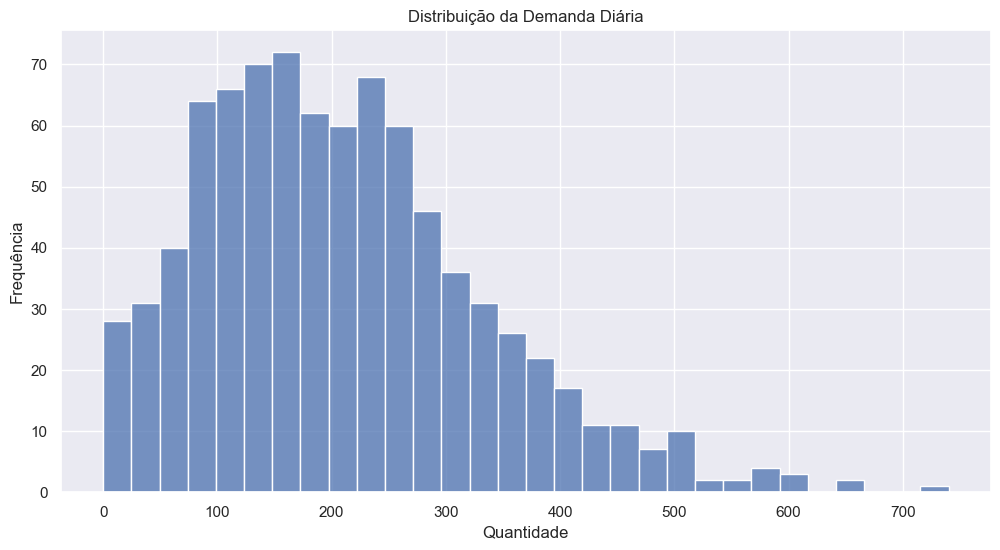

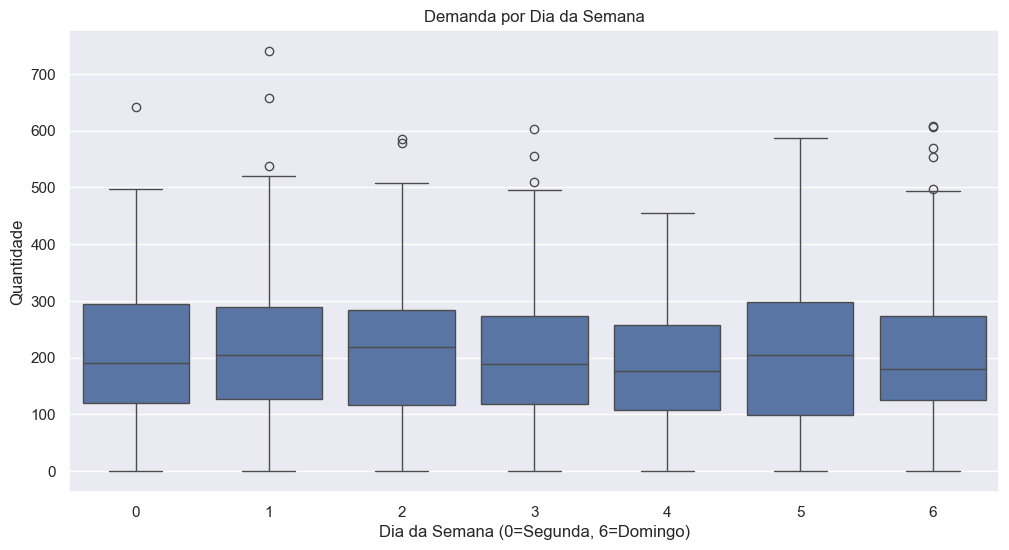

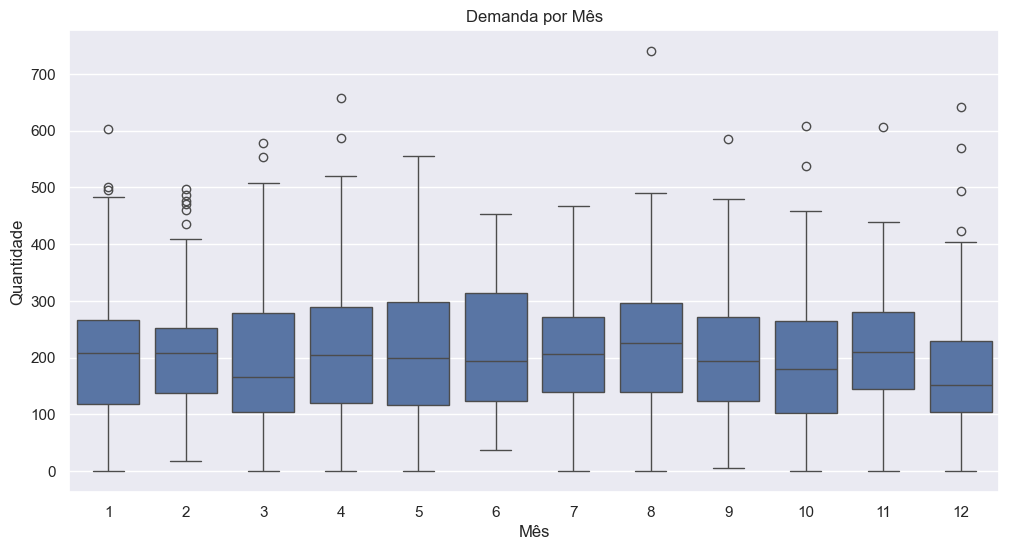


Estatísticas Descritivas da Demanda:
count    852.000000
mean     209.481221
std      123.942752
min        0.000000
25%      115.750000
50%      193.500000
75%      278.250000
max      740.000000
Name: y, dtype: float64


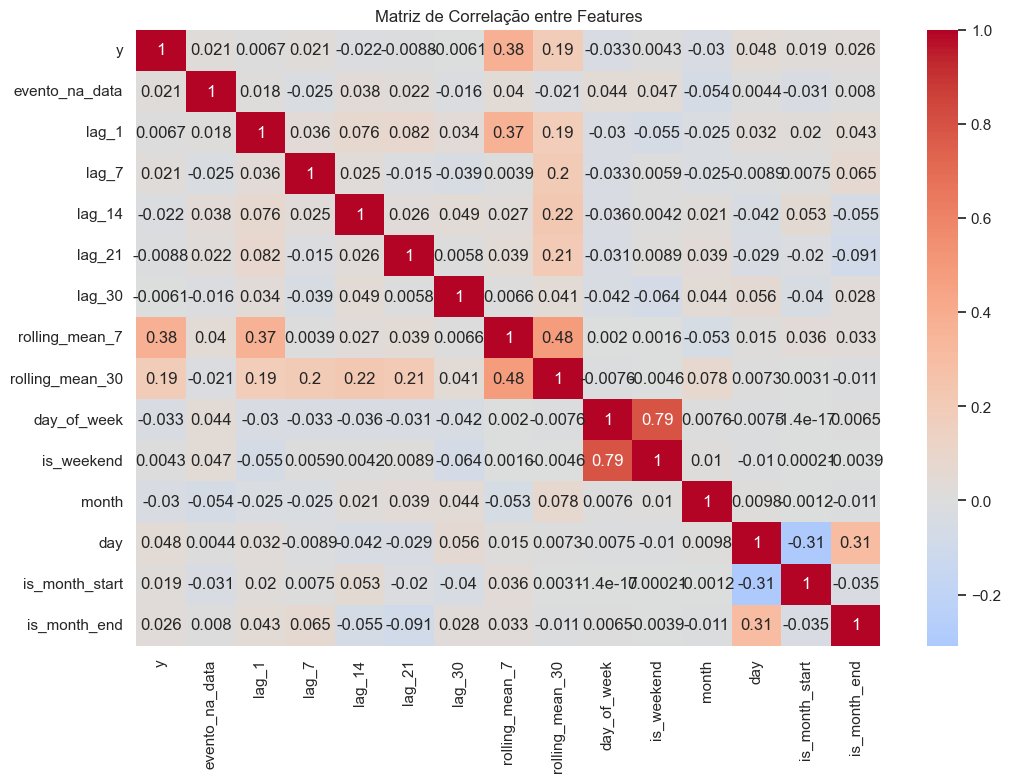


Impacto dos Eventos na Demanda:
                      mean         std  count
evento_na_data                               
0.0             207.812914  122.690471    604
1.0             213.544355  127.100832    248


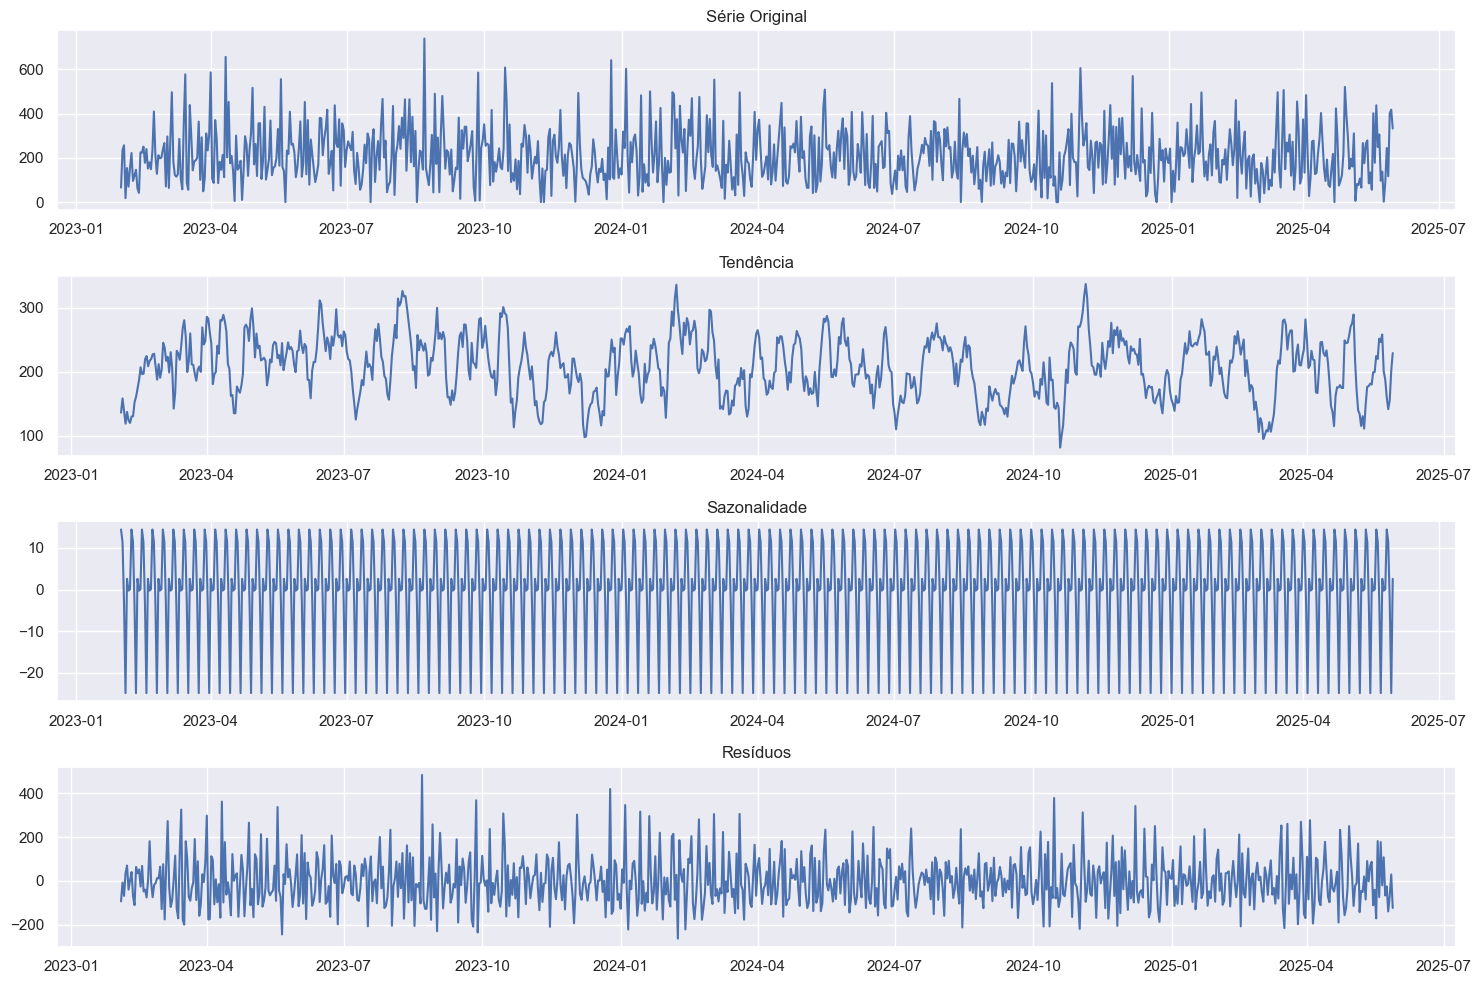

<Figure size 1500x600 with 0 Axes>

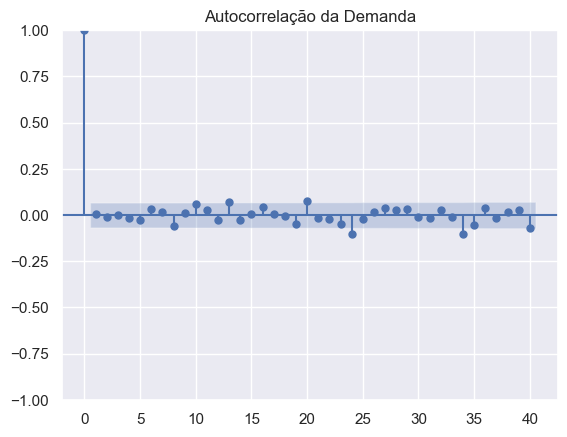

<Figure size 1500x600 with 0 Axes>

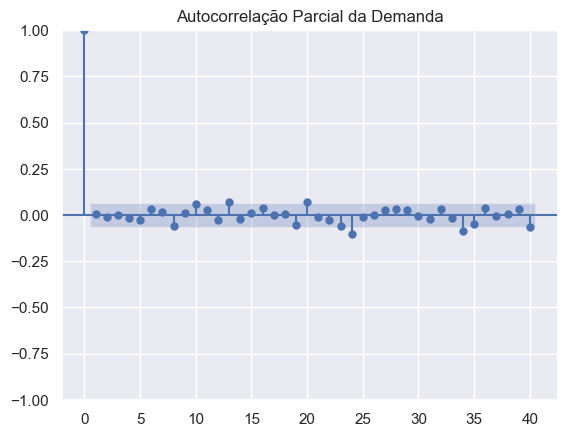


Resumo das Features Criadas:

Features de Lag:
Lag 1: count    852.000000
mean     209.279343
std      123.881390
min        0.000000
25%      115.750000
50%      192.500000
75%      278.000000
max      740.000000
Name: lag_1, dtype: float64
Lag 7: count    852.000000
mean     209.029343
std      123.535778
min        0.000000
25%      115.750000
50%      192.500000
75%      278.000000
max      740.000000
Name: lag_7, dtype: float64
Lag 14: count    852.000000
mean     207.704225
std      123.523531
min        0.000000
25%      114.000000
50%      191.500000
75%      277.250000
max      740.000000
Name: lag_14, dtype: float64
Lag 21: count    852.000000
mean     207.504695
std      123.537503
min        0.000000
25%      114.000000
50%      191.500000
75%      277.250000
max      740.000000
Name: lag_21, dtype: float64
Lag 30: count    852.000000
mean     207.974178
std      123.253445
min        0.000000
25%      115.000000
50%      192.000000
75%      277.000000
max      740.000000


In [11]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Carregar dados processados
df_demanda_features = pd.read_csv("../data/processed/demanda_features.csv", parse_dates=["date"])
df_demanda_features = df_demanda_features.set_index("date")

# Configurações de estilo para os gráficos
plt.style.use('default')  # Usando estilo padrão do matplotlib
sns.set_theme()  # Usando tema padrão do seaborn

# 1. Análise da Série Temporal
plt.figure(figsize=(15, 6))
plt.plot(df_demanda_features.index, df_demanda_features['y'], label='Demanda Diária')
plt.title('Evolução da Demanda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

# 2. Distribuição da Demanda
plt.figure(figsize=(12, 6))
sns.histplot(data=df_demanda_features, x='y', bins=30)
plt.title('Distribuição da Demanda Diária')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

# 3. Análise por Dia da Semana
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_demanda_features, x='day_of_week', y='y')
plt.title('Demanda por Dia da Semana')
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)')
plt.ylabel('Quantidade')
plt.show()

# 4. Análise por Mês
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_demanda_features, x='month', y='y')
plt.title('Demanda por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.show()

# 5. Estatísticas Descritivas
print("\nEstatísticas Descritivas da Demanda:")
print(df_demanda_features['y'].describe())

# 6. Análise de Correlação entre Features
plt.figure(figsize=(12, 8))
correlation_matrix = df_demanda_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Features')
plt.show()

# 7. Análise de Eventos
eventos_impacto = df_demanda_features.groupby('evento_na_data')['y'].agg(['mean', 'std', 'count'])
print("\nImpacto dos Eventos na Demanda:")
print(eventos_impacto)

# 8. Análise de Tendência e Sazonalidade
decomposition = seasonal_decompose(df_demanda_features['y'], period=7)

plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(df_demanda_features.index, df_demanda_features['y'])
plt.title('Série Original')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Tendência')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Sazonalidade')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Resíduos')
plt.tight_layout()
plt.show()

# 9. Análise de Autocorrelação
plt.figure(figsize=(15, 6))
plot_acf(df_demanda_features['y'], lags=40)
plt.title('Autocorrelação da Demanda')
plt.show()

plt.figure(figsize=(15, 6))
plot_pacf(df_demanda_features['y'], lags=40)
plt.title('Autocorrelação Parcial da Demanda')
plt.show()

# 10. Resumo das Features Criadas
print("\nResumo das Features Criadas:")
print("\nFeatures de Lag:")
for lag in [1, 7, 14, 21, 30]:
    print(f"Lag {lag}: {df_demanda_features[f'lag_{lag}'].describe()}")

print("\nMédias Móveis:")
print("Média Móvel 7 dias:", df_demanda_features['rolling_mean_7'].describe())
print("Média Móvel 30 dias:", df_demanda_features['rolling_mean_30'].describe())
